# NN trained on MNIST Dataset
### This is also my first Neural Network

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
#define the hyper-parameters
input_size = 28*28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

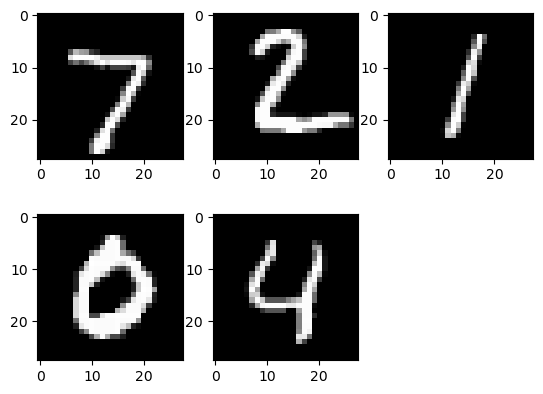

In [9]:
#dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                          train = True,
                                           transform = transforms.ToTensor(),
                                          download = True)
test_dataset = torchvision.datasets.MNIST(root = './data',
                                         transform = transforms.ToTensor(),
                                         train = False)
#load data
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

ex = iter(test_loader)
example_data, example_targets = next(ex)

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0],cmap='gray')
plt.show()

In [14]:
#neural network class with one hidden layer...size of hidden layer given as hyperparameter
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_layer, num_classes):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(input_dim, hidden_layer) #input se hidden layer jata hai
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_layer,num_classes) #hidden layer se num_classes se jata hai
    
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)

In [15]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step() #calculate weights
        optimizer.zero_grad() 

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], step [{i+1}/{n_total_steps}], loss: {loss.item():.4f}')

Epoch [1/2], step [100/600], loss: 0.3241
Epoch [1/2], step [200/600], loss: 0.3360
Epoch [1/2], step [300/600], loss: 0.1399
Epoch [1/2], step [400/600], loss: 0.2346
Epoch [1/2], step [500/600], loss: 0.2181
Epoch [1/2], step [600/600], loss: 0.1020
Epoch [2/2], step [100/600], loss: 0.1140
Epoch [2/2], step [200/600], loss: 0.1488
Epoch [2/2], step [300/600], loss: 0.0838
Epoch [2/2], step [400/600], loss: 0.1420
Epoch [2/2], step [500/600], loss: 0.1298
Epoch [2/2], step [600/600], loss: 0.0754


In [18]:
#Test the model
with torch.no_grad():
    n_correct = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        output = model(images)

        _, predicted = torch.max(output,1)
        n_correct += (predicted == labels).sum().item()

    acc = n_correct/n_samples
    print(f"Accuracy of the newtork on the {n_samples} test images: {100*acc}%")

Accuracy of the newtork on the 10000 test images: 97.14%
